https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

This is exercise around handling categorical data. Categorical variable typically consists of finite set of discrete labled data.

All categorical data should be encoded in neumerical format before they are used to train a model. if prediction label is categorical, prediction needs to be converted back to label data. 

Most popular ways 

Ordinal Encoding - for ordinal categorical data - which has natural ordering 
    
        pandars factorize method   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html
        skearn OrdinalEncoder, and LabelEncoder
        
Note: A numerical variable can be converted in to ordinal categorical varibale by process called discretization. In this process numerical range is devided in various bins. Example number from 1 to 10 in 1-2, 2-4, 5-6 ...

One-Hot encoding - for nominal categorical data which don't have natural ordering.


Dummey variable encoding



@ todo 

compare OrdinalEncoder vs LabelEncoder vs PD.factorize()



Ref:

https://pbpython.com/categorical-encoding.html   ## to read.



#### Ordinal Encoding  

Each category is assigned a integer value starting with 0. Number is assigned to sorted varible label. This kind of coading is specially suited for ordinal varaible where exits natural order between value. If this order is captured correctly in the coding model may learn the same. for this care might be required that coding actually captures natural order.

for nominal varibale where exisit no natural ordering this might cause problem in some case and One hot encoding can be used in such cases.

### LabelEncoder

Used typically for y - target variable. Functionally broadly same as OrdinalEncoder 

There are certain finer difference between this two Encoder based on their useges

1. LabelEncoder work on single dimention array vs OrdinalEncoder or two dimetion.
2. LavelEncoder doesn't allow to define order vs OrdinalEncoder allows.
3. LavelEncoder doesn't allow to ignore unknown label vs OrdinalEncoder allows.


order of column is important for OrdinalEncoder       


pd.factorize method.

this is another method to encode categorized field. However this does encoding just intime for given list and doesn't remember previous transformation mapping etc. Hence if we enode ["paris", "paris", "tokyo", "amsterdam"] and ["tokyo", "amsterdam"] tokyo will get different encoding both the time.

for any ML model to be meanigful consisitent encoding is important hence pd.factorize method can be used only for quick check but not a serious development.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np



In [ ]:
# Example LabelEncoder 
# LabelEncoder typcially used for y - target variable and expect one dimentional array.
# Note : in LabelEncoder there is no way to force a particular encoding order - probably because this is for y
# and there is no need of specific order

y = ["paris", "paris", "tokyo", "amsterdam"]

le1 = LabelEncoder()

le1.fit(y)
print("le1 - label order " , le1.classes_)

print('transform ')
print("y ", y)
print("encoded y ", le1.transform(y))

print('inverse transform ')
y_t2 = [1,0,0,1,2]
y2 = le1.inverse_transform(y_t2)
print("encoded y", y_t2)
print("y", y2)

## this will give error as delhi is never seen and also there is no way to suppress warning.

y=["tokyo", "delhi"]
# y_t = le1.transform(y)  



In [ ]:
# Example Ordinal Encoder - Typically used for X - input features

oe = OrdinalEncoder()

X = [["spring", "feb"],["summer", "june"],["winter", "dec"]]

oe.fit(X)

print("category learned by oe", oe.categories_)

X_t = oe.transform(X)
print(X)
print(X_t)

X_ = oe.inverse_transform(X_t)
print(X_)

In [ ]:
# whatif the categories are supplied out of order - guess error ?

X2=[[ "feb", "spring"],[ "june", "summer"],["dec", "winter"]]

X2_t = oe.transform(X2)

In [ ]:
# giving user defined encoding order

seasons = ['spring', 'winter', 'summer']
months =  ['jan', 'feb', 'june', 'dec']

oe2 = OrdinalEncoder(categories=[seasons, months])

X = [["spring", "feb"],["summer", "june"],["winter", "dec"]]

oe2.fit([["summer", "jan"]]) # while we have  configured the encoder through constructor , fit still need to be called :)
X_t = oe2.transform(X)
X_ = oe2.inverse_transform(X_t)

print(X)
print(X_t)
print(X_)

Categorical Fields

    Nominal
    
        menopause
        breast
        breast-quad
        
    Ordinal 

        age 
        tumor-size
        inv-nodes
        deg-malig
        
    binary
        node-caps
        irradiat
        


we will use one hot encodign for nominal field and intergr coding for ordinal field.
For ordinal field we shall make use of ranking 0 to n in synch with domain rule
binary will be represnted by 0 and 1.

In [ ]:
1. # this is my list of cities in some order of preference i want encoding to be done in this same order consisten.

2 # OneHotEncoding vs get_dummies 
# https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki

cities = ['tokyo', 'delhi', 'shanghai', 'sao paulo', 'maxico', 'ny', 'paris'] 
city_1 = ['shanghai', 'sao paulo' ,'tokyo', 'delhi']
city_2 = ['paris' , 'maxico', 'ny', 'shanghai']

code, unique = pd.factorize(cities)
code_1, unique_1 = pd.factorize(city_1)
code_2, unique_2 = pd.factorize(city_2)

print("Cities", cities)
print("Codes", code)
print(unique)
print('')
print("Cities", city_1)
print("Codes", code_1)
print(unique_1)
print('')

print("Cities", city_2)
print("Codes", code_2)
print(unique_2)

print('Note shanghai is mapped to 2, 0 and 3 respectively and there is no way to focre same mapping ')
print('factorization either incodes in order of label appearence in given data or sorted order')

# now lets try to make use of LabelEncoder

print()
print(" ######## LabelEncoder ####### ")
print()

le = LabelEncoder()
le.fit(cities)

print("LabelEncoder.classes_", le.classes_)

print("Cities", cities)
print("Codes", le.transform(cities))

print('')
print("Cities", city_1)
print("Codes", le.transform(city_1))

print('')

print("Cities", city_2)
print("Codes", le.transform(city_2))

print('Note shanghai is mapped to 5 in all the cases.')
print("LabelEncoder allows consistend incoding but doesn't allow any control on order")


# now lets try to make use of LabelEncoder

print()
print(" ######## OrdinalEncoder ####### ")
print()


ordered_cities = ['delhi', 'shanghai', 'tokyo', 'maxico', 'paris', 'sao paulo',  'ny'] 
oe = OrdinalEncoder(categories=[ordered_cities])

# OrdinalEncoder is designed for X - feature variable expect two dimention arrary one row every feature.

city_feature = np.array(ordered_cities).reshape(-1,1).tolist()

oe.fit(city_feature)

city_1 = ['shanghai', 'sao paulo' ,'tokyo', 'delhi']
city_2 = ['paris' , 'maxico', 'ny', 'shanghai']

city_1_feature = np.array(city_1).reshape(-1, 1).tolist()
city_2_feature = np.array(city_2).reshape(-1, 1).tolist()


print("oe.categories", oe.categories_)

print("Cities", city_feature)
print("Codes", oe.transform(city_feature))

print('')
print("Cities", city_1_feature)
print("Codes", oe.transform(city_1_feature))

print('')

print("Cities", city_2_feature)
print("Codes", oe.transform(city_2_feature))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

## what abt LabelBinarizer ????

colors = ['red', 'blue', 'green', 'yellow']
sizes=['S', 'M', 'L', 'XL', 'XXL']

ohe = OneHotEncoder(categories=[colors, sizes], sparse=False)
ohe.fit([['red', 'S']])

data = [['red', 'L'],['green','M'],['yellow', 'XL'],['blue', 'XXL']]

print(ohe.categories_)
print(data)
print(ohe.transform(data))

print(ohe.get_feature_names(['color', 'size']))

In [ ]:
df = pd.DataFrame(data, columns=['color', 'size'])
print(df)

In [ ]:
pd.get_dummies(df)

In [ ]:
# pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]


pd.get_dummies(df,  columns=['color', 'size'])

In [ ]:
ids = [11, 22, 33, 44, 55]
countries = ['Spain', 'France', 'Spain', 'Germany', 'France']

df = pd.DataFrame(data={'id':ids, 'country':countries})
print(df)

In [ ]:
pd.get_dummies(df, columns=['country'])

### Breast Cancer

Attrubute information 

1. Class: no-recurrence-events, recurrence-events  
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.   - Categorical , Ordinal 
3. menopause: lt40, ge40, premeno.  - Categorical nominal
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59. - Categorical , Ordinal 
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.  Categorical , Ordinal 
6. node-caps: yes, no.   Binary - use ordinal 1 for Yes (what if there is nan ? use HotEncoding
7. deg-malig: 1, 2, 3.    Categorical , Ordinal 
8. breast: left, right.    Categorical nominal
9. breast-quad: left-up, left-low, right-up, right-low, central.    Categorical nominal
10. irradiat: yes, no.  Binary - use ordinal 1 for Yes


A reasonable classification accuracy score on this dataset is between 68 percent and 73

Note that this dataset has missing values marked with a “nan” value.

We will leave these values as-is in this tutorial and use the encoding schemes to encode “nan” as just another value. This is one possible and quite reasonable approach to handling missing values for categorical variables.

In [139]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cancer_df = pd.read_csv('./data/breast-cancer.csv')

print(cancer_df.head())

X = cancer_df.copy()
y = X.pop('class')

       age  menopause tumor_size inv_nodes node_caps deg_malig   breast  \
0  '40-49'  'premeno'    '15-19'     '0-2'     'yes'       '3'  'right'   
1  '50-59'     'ge40'    '15-19'     '0-2'      'no'       '1'  'right'   
2  '50-59'     'ge40'    '35-39'     '0-2'      'no'       '2'   'left'   
3  '40-49'  'premeno'    '35-39'     '0-2'     'yes'       '3'  'right'   
4  '40-49'  'premeno'    '30-34'     '3-5'     'yes'       '2'   'left'   

  breast_quad irradiat                   class  
0   'left_up'     'no'     'recurrence-events'  
1   'central'     'no'  'no-recurrence-events'  
2  'left_low'     'no'     'recurrence-events'  
3  'left_low'    'yes'  'no-recurrence-events'  
4  'right_up'     'no'     'recurrence-events'  


In [140]:
print('Input', X.shape)
print('Output', y.shape)

Input (286, 9)
Output (286,)


In [141]:
# make this code generic

X.breast_quad = X.breast_quad.astype(str) 
X.node_caps = X.node_caps.astype(str) 

In [142]:
# As expected use OrdinalEncoder for X and LabelEncoder for y

X_encoder = OrdinalEncoder()
X_t = X_encoder.fit_transform(X)
y_encoder = LabelEncoder()
y_t = y_encoder.fit_transform(y)

In [143]:
X

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no'
...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no'


In [144]:
accuracy = 0.0

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_t, y_t,  test_size=0.33)
    model = LogisticRegression()
    # fit on the training set
    model.fit(X_train, y_train)
    # predict on test set
    yhat = model.predict(X_test)
    # evaluate predictions
    this_score = accuracy_score(y_test, yhat)
    accuracy = accuracy + this_score
    print('Accuracy: %.2f' % (this_score*100))


print('Average Accuracy: %.2f' % (accuracy*100/10))

Accuracy: 73.68
Accuracy: 70.53
Accuracy: 80.00
Accuracy: 72.63
Accuracy: 71.58
Accuracy: 67.37
Accuracy: 78.95
Accuracy: 82.11
Accuracy: 69.47
Accuracy: 71.58
Average Accuracy: 73.79


In [116]:
from sklearn.preprocessing import OneHotEncoder


onehot_encoder = OneHotEncoder(sparse=False)
X_onehotencoded = onehot_encoder.fit_transform(X)

In [ ]:
X_onehotencoded.shape

In [ ]:
X_onehotencoded[:5,:]

In [ ]:
onehot_encoder.categories_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_onehotencoded, y_t,  test_size=0.33, random_state=1)

In [ ]:
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [7]:
# for following columns we will use OrdinalEncoding


age_ord_list = ["'10-19'", "'20-29'", "'30-39'", "'40-49'", "'50-59'", "'60-69'", "'70-79'", "'80-89'", "'90-99'"]
tumor_size_ord_list = ["'0-4'", "'5-9'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'", "'35-39'", "'40-44'", "'45-49'", "'50-54'", "'55-59'"] 
inv_nodes_ord_list = ["'0-2'", "'3-5'", "'6-8'", "'9-11'", "'12-14'", "'15-17'", "'18-20'", "'21-23'", "'24-26'", "'27-29'", "'30-32'", "'33-35'", "'36-39'"]
deg_malig_ord_list = ["'1'", "'2'", "'3'"]




In [8]:
X_1 = pd.DataFrame()
X_1['age'] = X['age']
X_1['tumor_size'] = X['tumor_size']
X_1['inv_nodes'] = X['inv_nodes']
X_1['deg_malig'] = X['deg_malig'] 

In [9]:
oe = OrdinalEncoder(categories=[age_ord_list, tumor_size_ord_list, inv_nodes_ord_list, deg_malig_ord_list])
oe.fit(X_1)

OrdinalEncoder(categories=[["'10-19'", "'20-29'", "'30-39'", "'40-49'",
                            "'50-59'", "'60-69'", "'70-79'", "'80-89'",
                            "'90-99'"],
                           ["'0-4'", "'5-9'", "'10-14'", "'15-19'", "'20-24'",
                            "'25-29'", "'30-34'", "'35-39'", "'40-44'",
                            "'45-49'", "'50-54'", "'55-59'"],
                           ["'0-2'", "'3-5'", "'6-8'", "'9-11'", "'12-14'",
                            "'15-17'", "'18-20'", "'21-23'", "'24-26'",
                            "'27-29'", "'30-32'", "'33-35'", "'36-39'"],
                           ["'1'", "'2'", "'3'"]])

In [10]:
X_1_t = oe.transform(X_1)

In [11]:
print(X_1.head())
print(X_1_t[:5])

       age tumor_size inv_nodes deg_malig
0  '40-49'    '15-19'     '0-2'       '3'
1  '50-59'    '15-19'     '0-2'       '1'
2  '50-59'    '35-39'     '0-2'       '2'
3  '40-49'    '35-39'     '0-2'       '3'
4  '40-49'    '30-34'     '3-5'       '2'
[[3. 3. 0. 2.]
 [4. 3. 0. 0.]
 [4. 7. 0. 1.]
 [3. 7. 0. 2.]
 [3. 6. 1. 1.]]


In [12]:
X_2 = pd.DataFrame()
X_2['menopause'] = X['menopause'].astype(str) 
X_2['node_caps'] = X['node_caps'].astype(str) 
X_2['breast'] = X['breast'].astype(str) 
X_2['breast_quad'] = X['breast_quad'].astype(str) 
X_2['irradiat'] = X['irradiat'].astype(str) 

In [13]:
X_2[20:21]

,menopause,node_caps,breast,breast_quad,irradiat
20,'lt40',nan,'left','left_low','no'


In [16]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_2)

OneHotEncoder(sparse=False)

In [17]:
ohe.categories_

[array(["'ge40'", "'lt40'", "'premeno'"], dtype=object),
 array(["'no'", "'yes'", 'nan'], dtype=object),
 array(["'left'", "'right'"], dtype=object),
 array(["'central'", "'left_low'", "'left_up'", "'right_low'",
        "'right_up'", 'nan'], dtype=object),
 array(["'no'", "'yes'"], dtype=object)]

In [ ]:
X_2_t = ohe.transform(X_2)
print(X_2.head())
print(X_2_t[:5])

In [ ]:
type(X_2_t)

In [ ]:
y_encoder = LabelEncoder()
y_t = y_encoder.fit_transform(y)

In [ ]:
print(X_1_t.shape)
print(X_2_t.shape)
print(y_t.shape)

In [ ]:
X_t = np.concatenate((X_1_t, X_2_t), axis=1)
print(X_t.shape)

In [ ]:
accuracy = 0.0

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_t, y_t,  test_size=0.33)
    model = LogisticRegression()
    # fit on the training set
    model.fit(X_train, y_train)
    # predict on test set
    yhat = model.predict(X_test)
    # evaluate predictions
    this_score = accuracy_score(y_test, yhat)
    accuracy = accuracy + this_score
    print('Accuracy: %.2f' % (this_score*100))
    
    
print('Average Accuracy: %.2f' % (accuracy*100/10))


In [ ]:
for i in range(10):
    print(i)

## Let try to check MI on breast cancer data


this is a classification (and not regresison) problem hence we will use mutual_info_classif and not mutual_info_regression.




In [145]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

cancer_df = pd.read_csv('./data/breast-cancer.csv')
print(cancer_df.head())
X = cancer_df.copy()
y = X.pop('class')

       age  menopause tumor_size inv_nodes node_caps deg_malig   breast  \
0  '40-49'  'premeno'    '15-19'     '0-2'     'yes'       '3'  'right'   
1  '50-59'     'ge40'    '15-19'     '0-2'      'no'       '1'  'right'   
2  '50-59'     'ge40'    '35-39'     '0-2'      'no'       '2'   'left'   
3  '40-49'  'premeno'    '35-39'     '0-2'     'yes'       '3'  'right'   
4  '40-49'  'premeno'    '30-34'     '3-5'     'yes'       '2'   'left'   

  breast_quad irradiat                   class  
0   'left_up'     'no'     'recurrence-events'  
1   'central'     'no'  'no-recurrence-events'  
2  'left_low'     'no'     'recurrence-events'  
3  'left_low'    'yes'  'no-recurrence-events'  
4  'right_up'     'no'     'recurrence-events'  


In [146]:
# convert all columns to string to take care of nan
for column in X.columns:
    X[column] = X[column].astype(str) 
    
# encode to numbers     
oe = OrdinalEncoder()
oe.fit(X)
X_t = oe.transform(X)


le = LabelEncoder()
y_t = le.fit_transform(y)

In [148]:
miscore = mutual_info_classif(X_t, y_t, discrete_features=[True, True, True, True,True, True, True, True,True])
miscore = pd.Series(data=miscore, index=X.columns, name="miscore")
miscore = miscore.sort_values(ascending=False)
print(miscore)

deg_malig      0.053379
inv_nodes      0.047824
tumor_size     0.039628
node_caps      0.037030
irradiat       0.017896
breast_quad    0.010443
age            0.007351
breast         0.001725
menopause      0.001387
Name: miscore, dtype: float64


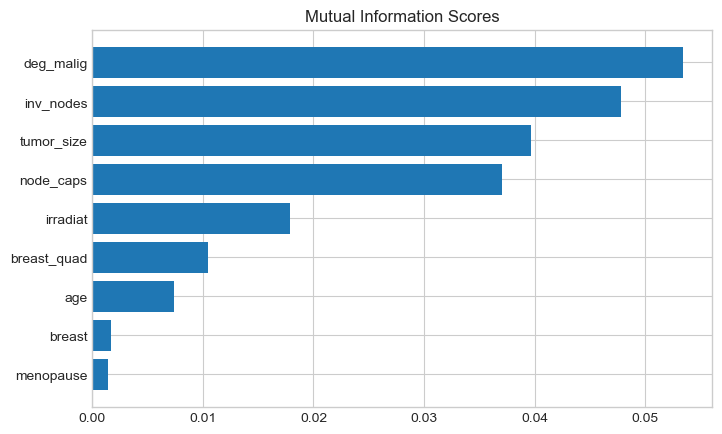

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-whitegrid")

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(miscore)